<a href="https://colab.research.google.com/github/winckey/CS_study/blob/master/ML_creadit_card_fraud_SSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (체험).머신러닝 모델링의 중요성 

##[a,b,a+b] 데이터

[예시1]

[패턴]
- 1,2,3
- 3,5,8
- 4,3,7

→

[예측]
- 3,2,? ->5
- 5,4,? ->9
- 6,6,? ->12


### [a,b,a+b] _ DecisioTreeRegressor 로 결과값예측하기

In [ ]:
import pandas as pd
import numpy as np
import sklearn ,random
from sklearn.tree import DecisionTreeRegressor
#training 데이터 제작
raw = [[1,2,3],[3,5,8],[4,3,7]]
df = pd.DataFrame(raw)
X_train = df[[0,1]]
y_train = df[2]
#모델 생성 & 학습
model=DecisionTreeRegressor(random_state=123)
model.fit(X_train,y_train)
#test 데이터 제작
print('검증용 데이터')
test_raw = [[3,2,5],[5,4,9],[6,6,12]]
for a in test_raw:
  print(a[0],a[1],'정답:',a[2])
df_test = pd.DataFrame(test_raw)
X_test = df_test[[0,1]]
y_test = df_test[2]
#test data 예측하기
print("모델의 예측값")
model.predict(X_test)

검증용 데이터
3 2 정답: 5
5 4 정답: 9
6 6 정답: 12
모델의 예측값


array([8., 7., 7.])

### [a,b,a+b] _ Linear Regression 으로 결과값예측하기

In [ ]:
import pandas as pd
import sklearn ,random
import numpy as np
from sklearn.linear_model import LinearRegression
#training 데이터 제작
raw = [[1,2,3],[3,5,8],[4,3,7]]
df = pd.DataFrame(raw)
X_train = df[[0,1]]
y_train = df[2]
#모델 생성 & 학습
model=LinearRegression()
model.fit(X_train,y_train)
#test 데이터 제작
print('검증용 데이터')
test_raw = [[3,2,5],[5,4,9],[6,6,12]]
for a in test_raw:
  print(a[0],a[1],'정답:',a[2])
df_test = pd.DataFrame(test_raw)
X_test = df_test[[0,1]]
y_test = df_test[2]
#test data 예측하기
print("모델의 예측값")
model.predict(X_test)

검증용 데이터
3 2 정답: 5
5 4 정답: 9
6 6 정답: 12
모델의 예측값


array([ 5.,  9., 12.])

### [a,b,a+b] _ DecisioTreeRegressor 로 결과값예측하기 _학습량증가

In [ ]:
import pandas as pd
import sklearn ,random
import numpy as np
from sklearn.tree import DecisionTreeRegressor
#training 데이터 제작
raw =[]
for a in range(100):
  for b in range(100):
    ra = random.randint(1,2*a+1)
    rb = random.randint(1,2*b+1)
    raw.append([ra,rb,ra+rb+(random.random()/100)])
df = pd.DataFrame(raw)
X_train = df[[0,1]]
y_train = df[2]
#모델 생성 & 학습
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
#test 데이터 제작
print('검증용 데이터')
test_raw = [[3,2,5],[5,4,9],[6,6,12]]
for a in test_raw:
  print(a[0],a[1],'정답:',a[2])
df_test = pd.DataFrame(test_raw)
X_test = df_test[[0,1]]
y_test = df_test[2]
#test data 예측하기
print("모델의 예측값")
model.predict(X_test)

검증용 데이터
3 2 정답: 5
5 4 정답: 9
6 6 정답: 12
모델의 예측값


array([ 5.00503708,  9.00833947, 12.00256142])

# 0.사전준비

In [ ]:
# 관련데이터 가져오기
# https://drive.google.com/file/d/1s-f8Q1mbi8W_UrvaY6Ee5T2AfH7IXfTo/view?usp=sharing
# https://drive.google.com/file/d/1s-f8Q1mbi8W_UrvaY6Ee5T2AfH7IXfTo/view?usp=share_link
#파일다운로드

# #pc/colab용
!pip install --upgrade gdown
import gdown
import zipfile
google_path = "https://drive.google.com/uc?id="
file_id = '1s-f8Q1mbi8W_UrvaY6Ee5T2AfH7IXfTo'
output_name = "credit_card_fraud.zip"
gdown.download(google_path+file_id,output_name,quiet=False)
fantasy_zip = zipfile.ZipFile("credit_card_fraud.zip")
fantasy_zip.extractall()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Downloading...
From (uriginal): https://drive.google.com/uc?id=1s-f8Q1mbi8W_UrvaY6Ee5T2AfH7IXfTo
From (redirected): https://drive.google.com/uc?id=1s-f8Q1mbi8W_UrvaY6Ee5T2AfH7IXfTo&confirm=t&uuid=bc69a6ab-a54d-451f-8a3f-e11f673b70e0
To: /content/credit_card_fraud.zip
100%|██████████| 69.2M/69.2M [00:03<00:00, 22.8MB/s]


# 1.ChatGPT를 통한 지도학습/분류 문제 프로그램 해결하기

In [ ]:
# 데이터 열기
# 데이터에서 class를 우리가 예측

# 3.현업문제해결
---

In [ ]:
#데이터 가져오기 _신용카드 사기데이터CSV 파일 가져오기
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [ ]:
#데이터 기본 틀 확인(상위 5개 데이터 가져오기)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#데이터 결과값 구조
df['Class'].value_counts()
# 0은 정상 거래데이터
# 1은 사기 거래데이터
# 사기거래데이터가 비정상적으로 적다.

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#기본 AI모델링을 통한 교차검증하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#각각의 feature의 양식확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
from sklearn.model_selection import train_test_split
#인자로 입력받은 DataFrame을 복사한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame을 반환

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time',axis=1,inplace=True)
  return df_copy

In [ ]:
#사전 데이터를 가공하고, train & test 데이터 분리하는 함수 만들기

def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)
  #time을 뺀 나머지 컬럼정리(클래스제외)
  X_feature = df_copy.iloc[:,:-1]
  #클래스값(타겟값만)
  y_target = df_copy.iloc[:,-1]

  X_train,X_test,y_train,y_test = train_test_split(X_feature,y_target,test_size=0.3,random_state=0,stratify=y_target)
  return X_train,X_test,y_train,y_test

In [ ]:
#df 데이터를 학습용 검증용 데이터로 분할
X_train,X_test,y_train,y_test = get_train_test_dataset(df)

In [ ]:
#학습용 데이터의 타겟값 비율 ( 0 - 정상데이터 / 1 - 사기데이터)
print(y_train.value_counts())
print(y_train.value_counts()/y_train.shape[0])
print(y_train.shape)

0    199020
1       344
Name: Class, dtype: int64
0    0.998275
1    0.001725
Name: Class, dtype: float64
(199364,)


In [ ]:
#검증용 데이터의 타겟값 비율 ( 0 - 정상데이터 / 1 - 사기데이터)
print(y_test.value_counts())
print(y_test.value_counts()/y_test.shape[0])
print(y_test.shape)

0    85295
1      148
Name: Class, dtype: int64
0    0.998268
1    0.001732
Name: Class, dtype: float64
(85443,)


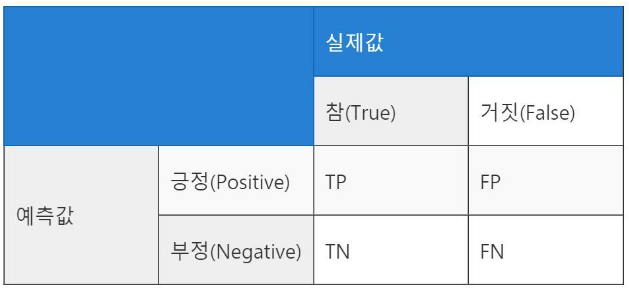

In [ ]:
#오차행렬 함수만들기
# def get_clf_eval(y_test,pred,pred_proba):


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_auc_score

def get_clf_eval(y_test, pred,pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('정확도(accuracy):{0:4f}, 정밀도(precision):{1:4f}, 재현율(recall):{2:4f}, F1:{3:4f}, AUC:{4:4f}'.format(accuracy, precision, recall,f1,roc_auc))

## 3-1 데이터 가공 없이 분류모델만들기

### 데이터 가공 없이 분류모델만들기- DecisionTree

In [ ]:
#데이터 가공 없이 분류모델만들기 - DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier(random_state=0)
dtc_clf.fit(X_train,y_train)
dtc_pred = dtc_clf.predict(X_test)
dtc_pred_proba = dtc_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,dtc_pred,dtc_pred_proba)

Confusion Matrix
[[85265    30]
 [   37   111]]
정확도(accuracy):0.999216, 정밀도(precision):0.787234, 재현율(recall):0.750000, F1:0.768166, AUC:0.874824





### 데이터 가공 없이 분류모델만들기- LogisticRegression

In [ ]:
#데이터 가공 없이 분류모델만들기 - LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000,random_state=0)
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lr_pred,lr_pred_proba)

Confusion Matrix
[[85280    15]
 [   56    92]]
정확도(accuracy):0.999169, 정밀도(precision):0.859813, 재현율(recall):0.621622, F1:0.721569, AUC:0.970429


### 데이터 가공 없이 분류모델만들기- LGBMClassifier

In [ ]:
!pip install lightgbm
#데이터 가공 없이 분류모델만들기 - LGBMClassifier
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False,random_state=0)
lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Confusion Matrix
[[85289     6]
 [   36   112]]
정확도(accuracy):0.999508, 정밀도(precision):0.949153, 재현율(recall):0.756757, F1:0.842105, AUC:0.979659


## 3-2 데이터 가공 후 분류 모델 만들기

### 데이터 가공하기(AMOUNT를 STANDARDSCALE 로 변환)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


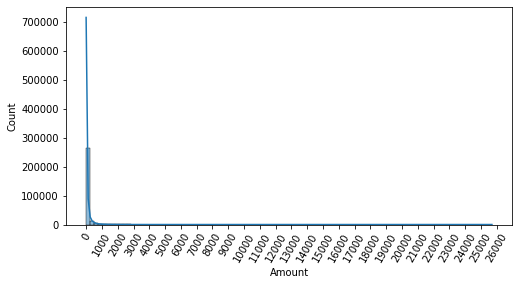

In [ ]:
!pip install seaborn
#데이터의 분포 확인하기
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.histplot(df['Amount'],bins=100,kde=True)
plt.show()

In [ ]:
#AMOUNT 컬럼을 정규분포로 변경하여 피처로 사용하기
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  df_copy.insert(0,'Amount_Scaled',amount_n) #Amount_Scaled 열을 하나 만들어서 처음에 넣어주기
  df_copy.drop(['Time','Amount'],axis=1,inplace=True) #Amount,Time 열을 삭제
  return df_copy

In [ ]:
#변환된 데이터로 다시 train_test split 진행
X_train,X_test,y_train,y_test = get_train_test_dataset(df)

In [ ]:
X_train['Amount_Scaled']

211605   -0.350471
231628   -0.131456
110643   -0.307251
11478    -0.313249
243724    8.802588
            ...   
88290    -0.293938
22346    -0.342914
269968    2.637499
175960    6.729380
47973     0.413604
Name: Amount_Scaled, Length: 199364, dtype: float64

#### 데이터 가공 후 분류모델만들기-Decision Tree

In [ ]:
#데이터 가공 없이 분류모델만들기 - LogisticRegression
# from sklearn import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,y_train)
dtc_pred = dtc_clf.predict(X_test)
dtc_pred_proba = dtc_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,dtc_pred,dtc_pred_proba)


# Confusion Matrix
# [[85268    27]
#  [   37   111]]
# 정확도:0.999251, 정밀도:0.804348, 재현율:0.750000, F1:0.776224, AUC:0.874842

Confusion Matrix
[[85266    29]
 [   38   110]]
정확도(accuracy):0.999216, 정밀도(precision):0.791367, 재현율(recall):0.743243, F1:0.766551, AUC:0.871452


#### 데이터 가공 후 분류모델만들기-LogisticRegression

In [ ]:
#데이터 가공 없이 분류모델만들기 - LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lr_pred,lr_pred_proba)

# Confusion Matrix
# [[85280    15]
#  [   56    92]]
# 정확도:0.999169, 정밀도:0.859813, 재현율:0.621622, F1:0.721569, AUC:0.970429

Confusion Matrix
[[85281    14]
 [   58    90]]
정확도(accuracy):0.999157, 정밀도(precision):0.865385, 재현율(recall):0.608108, F1:0.714286, AUC:0.970227


#### 데이터 가공 후 분류모델만들기-LGBMClassifier

In [ ]:
#데이터 가공 없이 분류모델만들기 - LGBMClassifier
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)

# Confusion Matrix
# [[85289     6]
#  [   36   112]]
# 정확도:0.999508, 정밀도:0.949153, 재현율:0.756757, F1:0.842105, AUC:0.979659

Confusion Matrix
[[85289     6]
 [   36   112]]
정확도(accuracy):0.999508, 정밀도(precision):0.949153, 재현율(recall):0.756757, F1:0.842105, AUC:0.977290


### 데이터 가공하기(AMOUNT를 LOG변환하기)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#AMOUNT 컬럼을 log로 변경하여 피처로 사용하기

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0,'Amount_Scaled',amount_n) #Amount_Scaled 열을 하나 만들어서 처음에 넣어주기
  df_copy.drop(['Time','Amount'],axis=1,inplace=True) #Amount,Time 열을 삭제
  return df_copy

In [ ]:
#변환된 데이터로 다시 train_test split 진행
X_train,X_test,y_train,y_test = get_train_test_dataset(df)

In [ ]:
X_train['Amount_Scaled']

211605    0.524729
231628    4.033710
110643    2.525729
11478     2.397895
243724    7.736766
            ...   
88290     2.761907
22346     1.275363
269968    6.618792
175960    7.480146
47973     5.261653
Name: Amount_Scaled, Length: 199364, dtype: float64

#### 데이터 가공 후 분류모델만들기-Decision Tree

In [ ]:
#데이터 가공 없이 분류모델만들기 - LogisticRegression
# from sklearn import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,y_train)
dtc_pred = dtc_clf.predict(X_test)
dtc_pred_proba = dtc_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,dtc_pred,dtc_pred_proba)


# Confusion Matrix
# [[85268    27]
#  [   37   111]]
# 정확도:0.999251, 정밀도:0.804348, 재현율:0.750000, F1:0.776224, AUC:0.874842

Confusion Matrix
[[85267    28]
 [   39   109]]
정확도(accuracy):0.999216, 정밀도(precision):0.795620, 재현율(recall):0.736486, F1:0.764912, AUC:0.868079


#### 데이터 가공 후 분류모델만들기-LogisticRegression

In [ ]:
#데이터 가공 없이 분류모델만들기 - LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lr_pred,lr_pred_proba)

# Confusion Matrix
# [[85280    15]
#  [   56    92]]
# 정확도:0.999169, 정밀도:0.859813, 재현율:0.621622, F1:0.721569, AUC:0.970429

Confusion Matrix
[[85283    12]
 [   59    89]]
정확도(accuracy):0.999169, 정밀도(precision):0.881188, 재현율(recall):0.601351, F1:0.714859, AUC:0.972683


#### 데이터 가공 후 분류모델만들기-LGBMClassifier

In [ ]:
#데이터 가공 없이 분류모델만들기 - LGBMClassifier
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)

# Confusion Matrix
# [[85289     6]
#  [   36   112]]
# 정확도:0.999508, 정밀도:0.949153, 재현율:0.756757, F1:0.842105, AUC:0.979659

Confusion Matrix
[[85290     5]
 [   35   113]]
정확도(accuracy):0.999532, 정밀도(precision):0.957627, 재현율(recall):0.763514, F1:0.849624, AUC:0.978552


### 데이터 가공하기(AMOUNT를 이상치데이터 제거)

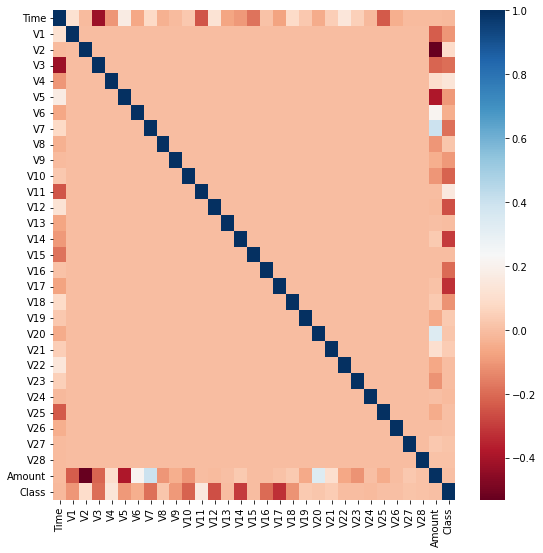

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,9))
corr = df.corr()
sns.heatmap(corr,cmap='RdBu')

In [ ]:
#상관관께를 조회해보고 가장 영향력이 큰 V17의 이상치를 제거해보겠다.
corr['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [ ]:
import numpy as np
def get_outlier(df=None,column=None,weight=1.5):
  df_copy = df.copy()
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values,25)
  quantile_75 = np.percentile(fraud.values,75)
  iqr = quantile_75-quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
  return outlier_index


In [ ]:
get_outlier(df=df,column='V17',weight=1)

Int64Index([42473, 42528, 42609, 42635, 42674, 42856, 150665], dtype='int64')

In [ ]:

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0,'Amount_Scaled',amount_n) #Amount_Scaled 열을 하나 만들어서 처음에 넣어주기
  df_copy.drop(['Time','Amount'],axis=1,inplace=True) #Amount,Time 열을 삭제
  outlier_index = get_outlier(df=df_copy, column='V17',weight =1)
  df_copy.drop(outlier_index,axis=0,inplace=True)
  return df_copy

In [ ]:
#변환된 데이터로 다시 train_test split 진행
X_train,X_test,y_train,y_test = get_train_test_dataset(df)

In [ ]:
X_train['Amount_Scaled']

211605    0.524729
36491     4.473922
279521    1.305626
11478     2.397895
51391     3.365916
            ...   
88290     2.761907
22346     1.275363
269968    6.618792
175960    7.480146
47973     5.261653
Name: Amount_Scaled, Length: 199360, dtype: float64

#### 데이터 가공 후 분류모델만들기-Decision Tree

In [ ]:
#데이터 가공 없이 분류모델만들기 - LogisticRegression
# from sklearn import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,y_train)
dtc_pred = dtc_clf.predict(X_test)
dtc_pred_proba = dtc_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,dtc_pred,dtc_pred_proba)


# Confusion Matrix
# [[85268    27]
#  [   37   111]]
# 정확도:0.999251, 정밀도:0.804348, 재현율:0.750000, F1:0.776224, AUC:0.874842

#v14 일때
# Confusion Matrix
# [[85259    36]
#  [   34   112]]
# 정확도:0.999181, 정밀도:0.756757, 재현율:0.767123, F1:0.761905, AUC:0.883351

Confusion Matrix
[[85258    37]
 [   40   105]]
정확도(accuracy):0.999099, 정밀도(precision):0.739437, 재현율(recall):0.724138, F1:0.731707, AUC:0.861852


#### 데이터 가공 후 분류모델만들기-LogisticRegression

In [ ]:
#데이터 가공 없이 분류모델만들기 - LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lr_pred,lr_pred_proba)

# Confusion Matrix
# [[85281    14]
#  [   58    90]]
# 정확도:0.999157, 정밀도:0.865385, 재현율:0.608108, F1:0.714286, AUC:0.970227

#v14일때
# Confusion Matrix
# [[85281    14]
#  [   48    98]]
# 정확도:0.999274, 정밀도:0.875000, 재현율:0.671233, F1:0.759690, AUC:0.974272

Confusion Matrix
[[85280    15]
 [   53    92]]
정확도(accuracy):0.999204, 정밀도(precision):0.859813, 재현율(recall):0.634483, F1:0.730159, AUC:0.960774


#### 데이터 가공 후 분류모델만들기-LGBMClassifier

In [ ]:
#데이터 가공 없이 분류모델만들기 - LGBMClassifier
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)

# Confusion Matrix
# [[85289     6]
#  [   36   112]]
# 정확도:0.999508, 정밀도:0.949153, 재현율:0.756757, F1:0.842105, AUC:0.977290

#v14일떄
# Confusion Matrix
# [[85291     4]
#  [   25   121]]
# 정확도:0.999661, 정밀도:0.968000, 재현율:0.828767, F1:0.892989, AUC:0.983070

Confusion Matrix
[[85290     5]
 [   32   113]]
정확도(accuracy):0.999567, 정밀도(precision):0.957627, 재현율(recall):0.779310, F1:0.859316, AUC:0.977640


### 데이터 가공하기(SMOTE 기법을 활용한 오버샘플링)

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
#smote 기법 적용, 전체비율을 20% 수준으로 업그레이드
smote = SMOTE(sampling_strategy=0.2,random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train,y_train) # y_train의 타겟값을 기반으로, X_train데이터와 y_train데이터를 증식, y_train값이 1:1이 되게 증식

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#기존의 X_train,y_train 의 개수
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(199360, 29)
(199360,)
0    199020
1       340
Name: Class, dtype: int64


In [ ]:
print(X_train_over.shape)
print(y_train_over.shape)
print(y_train_over.value_counts())

(238824, 29)
(238824,)
0    199020
1     39804
Name: Class, dtype: int64


#### 데이터 가공 후 분류모델만들기-Decision Tree

In [ ]:
#SMOTE기법 후 분류모델만들기 - DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train_over,y_train_over)
dtc_pred = dtc_clf.predict(X_test)
dtc_pred_proba = dtc_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,dtc_pred,dtc_pred_proba)

Confusion Matrix
[[85129   166]
 [   32   113]]
정확도(accuracy):0.997683, 정밀도(precision):0.405018, 재현율(recall):0.779310, F1:0.533019, AUC:0.888682


#### 데이터 가공 후 분류모델만들기-LogisticRegression

In [ ]:
#SMOTE기법 후 분류모델만들기 - LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train_over,y_train_over)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lr_pred,lr_pred_proba)

Confusion Matrix
[[84864   431]
 [   24   121]]
정확도(accuracy):0.994675, 정밀도(precision):0.219203, 재현율(recall):0.834483, F1:0.347202, AUC:0.965523


#### 데이터 가공 후 분류모델만들기-LGBMClassifier

In [ ]:
#SMOTE기법 후 분류모델만들기 - LGBMClassifier
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
lgbm_clf.fit(X_train_over,y_train_over)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)

Confusion Matrix
[[85284    11]
 [   29   116]]
정확도(accuracy):0.999532, 정밀도(precision):0.913386, 재현율(recall):0.800000, F1:0.852941, AUC:0.982175


## 최적의 smote 오버샘플링 비율은 얼마일까?

In [ ]:
#0.05 / 0.10 / 0.15 / ---- 0.95 / 1.0
for ratio in range(1,21):
  print("!!!!!!!!!!!!!! 사기데이터 % 변경!!!!!!!!!!!!!")
  print(ratio*0.05)

  smote = SMOTE(sampling_strategy=ratio*0.05,random_state=0)
  X_train_over, y_train_over = smote.fit_resample(X_train,y_train)
    #기존의 X_train,y_train 의 개수
  print(X_train.shape)
  print(y_train.shape)
  print(y_train.value_counts())

  print(X_train_over.shape)
  print(y_train_over.shape)
  print(y_train_over.value_counts())

    #SMOTE기법 후 분류모델만들기 - DecisionTreeClassifier
  print(f'{ratio*0.05} 사기데이터 처리, DecisionTreeClassifier')
  dtc_clf = DecisionTreeClassifier(random_state=0)
  dtc_clf.fit(X_train_over,y_train_over)
  dtc_pred = dtc_clf.predict(X_test)
  dtc_pred_proba = dtc_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
  get_clf_eval(y_test,dtc_pred,dtc_pred_proba)


    #SMOTE기법 후 분류모델만들기 - LogisticRegression
  print(f'{ratio*0.05} 사기데이터 처리, LogisticRegression')
  lr_clf = LogisticRegression(max_iter=1000,random_state=0)
  lr_clf.fit(X_train_over,y_train_over)
  lr_pred = lr_clf.predict(X_test)
  lr_pred_proba = lr_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
  get_clf_eval(y_test,lr_pred,lr_pred_proba)

    #SMOTE기법 후 분류모델만들기 - LGBMClassifier
  print(f'{ratio*0.05} 사기데이터 처리, LGBMClassifier')
  lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False,random_state=0)
  lgbm_clf.fit(X_train_over,y_train_over)
  lgbm_pred = lgbm_clf.predict(X_test)
  lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1] # 전체 데이터의 확률을 구하기 때문에 뒤에데이터가 확률이다
  get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)

!!!!!!!!!!!!!! 사기데이터 % 변경!!!!!!!!!!!!!
0.05
(199360, 29)
(199360,)
0    199020
1       340
Name: Class, dtype: int64
(208971, 29)
(208971,)
0    199020
1      9951
Name: Class, dtype: int64
0.05 사기데이터 처리, DecisionTreeClassifier
Confusion Matrix
[[85124   171]
 [   34   111]]
정확도(accuracy):0.997601, 정밀도(precision):0.393617, 재현율(recall):0.765517, F1:0.519906, AUC:0.881756
0.05 사기데이터 처리, LogisticRegression
Confusion Matrix
[[85236    59]
 [   30   115]]
정확도(accuracy):0.998958, 정밀도(precision):0.660920, 재현율(recall):0.793103, F1:0.721003, AUC:0.966061
0.05 사기데이터 처리, LGBMClassifier
Confusion Matrix
[[85288     7]
 [   28   117]]
정확도(accuracy):0.999590, 정밀도(precision):0.943548, 재현율(recall):0.806897, F1:0.869888, AUC:0.979670
!!!!!!!!!!!!!! 사기데이터 % 변경!!!!!!!!!!!!!
0.1
(199360, 29)
(199360,)
0    199020
1       340
Name: Class, dtype: int64
(218922, 29)
(218922,)
0    199020
1     19902
Name: Class, dtype: int64
0.1 사기데이터 처리, DecisionTreeClassifier
Confusion Matrix
[[85116   179]
 [   29   116]]